In [1]:
import pandas as pd
import numpy as np
import re
import os
import random
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
file_path = r'/Users/viveksajithasujan/Library/CloudStorage/OneDrive-UniversityofSussex/Term 2/Machine Learning/Final Assignment/OneDrive_1_07-05-2025'

In [4]:
def clean_dataset(df):
    print(df.info())
    shape_before = df.shape[0]
    df = df.drop_duplicates()
    shape_after = df.shape[0]

    # Drop rows where all values are NaN
    df = df.dropna()
    print("\nShape after dropping fully empty rows:", df.shape)
    print("Shape before dropping duplicates:", shape_before)
    print("Shape after dropping duplicates:", shape_after)

    # Identify columns ending with _month_1 to _month_12
    monthly_cols = [col for col in df.columns if any(col.endswith(f"_month_{i}") for i in range(1, 13))]

    if len(monthly_cols) != 12:
        print("\nWarning: Expected 12 monthly columns, found:", len(monthly_cols))
    
    # Extract common prefix (before '_month_')
    prefix = monthly_cols[0].rsplit('_month_', 1)[0]
    new_col_name = f"{prefix}_annual_avg"

    # Compute and assign the new column
    df[new_col_name] = df[monthly_cols].mean(axis=1)

    # Drop the monthly columns
    df = df.drop(columns=monthly_cols)

    print("\nNew annual average column name:", new_col_name)
    print("Shape after calculating the annual average:", df.shape)

    return df

## Cleaning datasets

In [6]:
df_canop_int = pd.read_csv(file_path + r'/CanopInt_inst_data.csv')
df_canop_int = clean_dataset(df_canop_int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   longitude               194298 non-null  float64
 1   latitude                194298 non-null  float64
 2   CanopInt_inst_month_1   194298 non-null  float64
 3   CanopInt_inst_month_2   194298 non-null  float64
 4   CanopInt_inst_month_3   194298 non-null  float64
 5   CanopInt_inst_month_4   194298 non-null  float64
 6   CanopInt_inst_month_5   194298 non-null  float64
 7   CanopInt_inst_month_6   194298 non-null  float64
 8   CanopInt_inst_month_7   194298 non-null  float64
 9   CanopInt_inst_month_8   194298 non-null  float64
 10  CanopInt_inst_month_9   194298 non-null  float64
 11  CanopInt_inst_month_10  194298 non-null  float64
 12  CanopInt_inst_month_11  194298 non-null  float64
 13  CanopInt_inst_month_12  194298 non-null  float64
 14  year                

In [7]:
df_esoil = pd.read_csv(file_path + r'/ESoil_tavg_data.csv')
df_esoil = clean_dataset(df_esoil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   longitude            194298 non-null  float64
 1   latitude             194298 non-null  float64
 2   ESoil_tavg_month_1   194298 non-null  float64
 3   ESoil_tavg_month_2   194298 non-null  float64
 4   ESoil_tavg_month_3   194298 non-null  float64
 5   ESoil_tavg_month_4   194298 non-null  float64
 6   ESoil_tavg_month_5   194298 non-null  float64
 7   ESoil_tavg_month_6   194298 non-null  float64
 8   ESoil_tavg_month_7   194298 non-null  float64
 9   ESoil_tavg_month_8   194298 non-null  float64
 10  ESoil_tavg_month_9   194298 non-null  float64
 11  ESoil_tavg_month_10  194298 non-null  float64
 12  ESoil_tavg_month_11  194298 non-null  float64
 13  ESoil_tavg_month_12  194298 non-null  float64
 14  year                 194298 non-null  int64  
dtypes: float64(14), i

In [8]:
df_rainf = pd.read_csv(file_path + r'/Rainf_tavg_data.csv')
df_rainf = clean_dataset(df_rainf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   longitude            194298 non-null  float64
 1   latitude             194298 non-null  float64
 2   Rainf_tavg_month_1   194298 non-null  float64
 3   Rainf_tavg_month_2   194298 non-null  float64
 4   Rainf_tavg_month_3   194298 non-null  float64
 5   Rainf_tavg_month_4   194298 non-null  float64
 6   Rainf_tavg_month_5   194298 non-null  float64
 7   Rainf_tavg_month_6   194298 non-null  float64
 8   Rainf_tavg_month_7   194298 non-null  float64
 9   Rainf_tavg_month_8   194298 non-null  float64
 10  Rainf_tavg_month_9   194298 non-null  float64
 11  Rainf_tavg_month_10  194298 non-null  float64
 12  Rainf_tavg_month_11  194298 non-null  float64
 13  Rainf_tavg_month_12  194298 non-null  float64
 14  year                 194298 non-null  int64  
dtypes: float64(14), i

In [9]:
df_snowf = pd.read_csv(file_path + r'/Snowf_tavg_data.csv')
df_snowf = clean_dataset(df_snowf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   longitude            194298 non-null  float64
 1   latitude             194298 non-null  float64
 2   Snowf_tavg_month_1   194298 non-null  float64
 3   Snowf_tavg_month_2   194298 non-null  float64
 4   Snowf_tavg_month_3   194298 non-null  float64
 5   Snowf_tavg_month_4   194298 non-null  float64
 6   Snowf_tavg_month_5   194298 non-null  float64
 7   Snowf_tavg_month_6   194298 non-null  float64
 8   Snowf_tavg_month_7   194298 non-null  float64
 9   Snowf_tavg_month_8   194298 non-null  float64
 10  Snowf_tavg_month_9   194298 non-null  float64
 11  Snowf_tavg_month_10  194298 non-null  float64
 12  Snowf_tavg_month_11  194298 non-null  float64
 13  Snowf_tavg_month_12  194298 non-null  float64
 14  year                 194298 non-null  int64  
dtypes: float64(14), i

In [10]:
df_transpiration = pd.read_csv(file_path + r'/TVeg_tavg_data.csv')
df_transpiration = clean_dataset(df_transpiration)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   longitude           194298 non-null  float64
 1   latitude            194298 non-null  float64
 2   TVeg_tavg_month_1   194298 non-null  float64
 3   TVeg_tavg_month_2   194298 non-null  float64
 4   TVeg_tavg_month_3   194298 non-null  float64
 5   TVeg_tavg_month_4   194298 non-null  float64
 6   TVeg_tavg_month_5   194298 non-null  float64
 7   TVeg_tavg_month_6   194298 non-null  float64
 8   TVeg_tavg_month_7   194298 non-null  float64
 9   TVeg_tavg_month_8   194298 non-null  float64
 10  TVeg_tavg_month_9   194298 non-null  float64
 11  TVeg_tavg_month_10  194298 non-null  float64
 12  TVeg_tavg_month_11  194298 non-null  float64
 13  TVeg_tavg_month_12  194298 non-null  float64
 14  year                194298 non-null  int64  
dtypes: float64(14), int64(1)
memory us

In [11]:
df_transpiration = pd.read_csv(file_path + r'/TWS_inst_data.csv')
df_transpiration['TWS_inst_month_2'] = np.where(df_transpiration['year']==2019, 0,df_transpiration['TWS_inst_month_2'] )
df_transpiration['TWS_inst_month_3'] = np.where(df_transpiration['year']==2019, 0,df_transpiration['TWS_inst_month_3'] )

df_transpiration = clean_dataset(df_transpiration)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   longitude          194298 non-null  float64
 1   latitude           194298 non-null  float64
 2   TWS_inst_month_1   194298 non-null  float64
 3   TWS_inst_month_2   194298 non-null  float64
 4   TWS_inst_month_3   194298 non-null  float64
 5   TWS_inst_month_4   194298 non-null  float64
 6   TWS_inst_month_5   194298 non-null  float64
 7   TWS_inst_month_6   194298 non-null  float64
 8   TWS_inst_month_7   194298 non-null  float64
 9   TWS_inst_month_8   194298 non-null  float64
 10  TWS_inst_month_9   194298 non-null  float64
 11  TWS_inst_month_10  194298 non-null  float64
 12  TWS_inst_month_11  194298 non-null  float64
 13  TWS_inst_month_12  194298 non-null  float64
 14  year               194298 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 22.2 MB
None

In [12]:
df_soil_moist_0_10 = pd.read_csv(file_path + r'/SoilMoi0_10cm_inst_data.csv')
df_soil_moist_0_10 = clean_dataset(df_soil_moist_0_10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   longitude                    194298 non-null  float64
 1   latitude                     194298 non-null  float64
 2   SoilMoi0_10cm_inst_month_1   194298 non-null  float64
 3   SoilMoi0_10cm_inst_month_2   194298 non-null  float64
 4   SoilMoi0_10cm_inst_month_3   194298 non-null  float64
 5   SoilMoi0_10cm_inst_month_4   194298 non-null  float64
 6   SoilMoi0_10cm_inst_month_5   194298 non-null  float64
 7   SoilMoi0_10cm_inst_month_6   194298 non-null  float64
 8   SoilMoi0_10cm_inst_month_7   194298 non-null  float64
 9   SoilMoi0_10cm_inst_month_8   194298 non-null  float64
 10  SoilMoi0_10cm_inst_month_9   194298 non-null  float64
 11  SoilMoi0_10cm_inst_month_10  194298 non-null  float64
 12  SoilMoi0_10cm_inst_month_11  194298 non-null  float64
 13 

In [13]:
df_soil_moist_10_40 = pd.read_csv(file_path + r'/SoilMoi10_40cm_inst_data.csv')
df_soil_moist_10_40 = clean_dataset(df_soil_moist_10_40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   longitude                     194298 non-null  float64
 1   latitude                      194298 non-null  float64
 2   SoilMoi10_40cm_inst_month_1   194298 non-null  float64
 3   SoilMoi10_40cm_inst_month_2   194298 non-null  float64
 4   SoilMoi10_40cm_inst_month_3   194298 non-null  float64
 5   SoilMoi10_40cm_inst_month_4   194298 non-null  float64
 6   SoilMoi10_40cm_inst_month_5   194298 non-null  float64
 7   SoilMoi10_40cm_inst_month_6   194298 non-null  float64
 8   SoilMoi10_40cm_inst_month_7   194298 non-null  float64
 9   SoilMoi10_40cm_inst_month_8   194298 non-null  float64
 10  SoilMoi10_40cm_inst_month_9   194298 non-null  float64
 11  SoilMoi10_40cm_inst_month_10  194298 non-null  float64
 12  SoilMoi10_40cm_inst_month_11  194298 non-nul

In [14]:
df_soil_moist_40_100 = pd.read_csv(file_path + r'/SoilMoi40_100cm_inst_data.csv')
df_soil_moist_40_100 = clean_dataset(df_soil_moist_40_100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   longitude                      194298 non-null  float64
 1   latitude                       194298 non-null  float64
 2   SoilMoi40_100cm_inst_month_1   194298 non-null  float64
 3   SoilMoi40_100cm_inst_month_2   194298 non-null  float64
 4   SoilMoi40_100cm_inst_month_3   194298 non-null  float64
 5   SoilMoi40_100cm_inst_month_4   194298 non-null  float64
 6   SoilMoi40_100cm_inst_month_5   194298 non-null  float64
 7   SoilMoi40_100cm_inst_month_6   194298 non-null  float64
 8   SoilMoi40_100cm_inst_month_7   194298 non-null  float64
 9   SoilMoi40_100cm_inst_month_8   194298 non-null  float64
 10  SoilMoi40_100cm_inst_month_9   194298 non-null  float64
 11  SoilMoi40_100cm_inst_month_10  194298 non-null  float64
 12  SoilMoi40_100cm_inst_month_11 

In [15]:
df_soil_moist_100_200 = pd.read_csv(file_path + r'/SoilMoi100_200cm_inst_data.csv')
df_soil_moist_100_200['SoilMoi100_200cm_inst_month_8'] = np.where(df_soil_moist_100_200['year']==2015, 0,df_soil_moist_100_200['SoilMoi100_200cm_inst_month_8'] )

df_soil_moist_100_200 = clean_dataset(df_soil_moist_100_200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   longitude                       194298 non-null  float64
 1   latitude                        194298 non-null  float64
 2   SoilMoi100_200cm_inst_month_1   194298 non-null  float64
 3   SoilMoi100_200cm_inst_month_2   194298 non-null  float64
 4   SoilMoi100_200cm_inst_month_3   194298 non-null  float64
 5   SoilMoi100_200cm_inst_month_4   194298 non-null  float64
 6   SoilMoi100_200cm_inst_month_5   194298 non-null  float64
 7   SoilMoi100_200cm_inst_month_6   194298 non-null  float64
 8   SoilMoi100_200cm_inst_month_7   194298 non-null  float64
 9   SoilMoi100_200cm_inst_month_8   194298 non-null  float64
 10  SoilMoi100_200cm_inst_month_9   194298 non-null  float64
 11  SoilMoi100_200cm_inst_month_10  194298 non-null  float64
 12  SoilMoi100_200cm

In [17]:
df_soil_temp_0_10 = pd.read_csv(file_path + r'/SoilTMP0_10cm_inst_data.csv')
df_soil_temp_0_10 = clean_dataset(df_soil_temp_0_10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   longitude                    194298 non-null  float64
 1   latitude                     194298 non-null  float64
 2   SoilTMP0_10cm_inst_month_1   194298 non-null  float64
 3   SoilTMP0_10cm_inst_month_2   194298 non-null  float64
 4   SoilTMP0_10cm_inst_month_3   194298 non-null  float64
 5   SoilTMP0_10cm_inst_month_4   194298 non-null  float64
 6   SoilTMP0_10cm_inst_month_5   194298 non-null  float64
 7   SoilTMP0_10cm_inst_month_6   194298 non-null  float64
 8   SoilTMP0_10cm_inst_month_7   194298 non-null  float64
 9   SoilTMP0_10cm_inst_month_8   194298 non-null  float64
 10  SoilTMP0_10cm_inst_month_9   194298 non-null  float64
 11  SoilTMP0_10cm_inst_month_10  194298 non-null  float64
 12  SoilTMP0_10cm_inst_month_11  194298 non-null  float64
 13 

In [19]:
df_soil_temp_10_40 = pd.read_csv(file_path + r'/SoilTMP10_40cm_inst_data.csv')
df_soil_temp_10_40 = clean_dataset(df_soil_temp_10_40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   longitude                     194298 non-null  float64
 1   latitude                      194298 non-null  float64
 2   SoilTMP10_40cm_inst_month_1   194298 non-null  float64
 3   SoilTMP10_40cm_inst_month_2   194298 non-null  float64
 4   SoilTMP10_40cm_inst_month_3   194298 non-null  float64
 5   SoilTMP10_40cm_inst_month_4   194298 non-null  float64
 6   SoilTMP10_40cm_inst_month_5   194298 non-null  float64
 7   SoilTMP10_40cm_inst_month_6   194298 non-null  float64
 8   SoilTMP10_40cm_inst_month_7   194298 non-null  float64
 9   SoilTMP10_40cm_inst_month_8   194298 non-null  float64
 10  SoilTMP10_40cm_inst_month_9   194298 non-null  float64
 11  SoilTMP10_40cm_inst_month_10  194298 non-null  float64
 12  SoilTMP10_40cm_inst_month_11  194298 non-nul

In [21]:
df_soil_temp_40_100 = pd.read_csv(file_path + r'/SoilTMP40_100cm_inst_data.csv')
df_soil_temp_40_100 = clean_dataset(df_soil_temp_40_100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   longitude                      194298 non-null  float64
 1   latitude                       194298 non-null  float64
 2   SoilTMP40_100cm_inst_month_1   194298 non-null  float64
 3   SoilTMP40_100cm_inst_month_2   194298 non-null  float64
 4   SoilTMP40_100cm_inst_month_3   194298 non-null  float64
 5   SoilTMP40_100cm_inst_month_4   194298 non-null  float64
 6   SoilTMP40_100cm_inst_month_5   194298 non-null  float64
 7   SoilTMP40_100cm_inst_month_6   194298 non-null  float64
 8   SoilTMP40_100cm_inst_month_7   194298 non-null  float64
 9   SoilTMP40_100cm_inst_month_8   194298 non-null  float64
 10  SoilTMP40_100cm_inst_month_9   194298 non-null  float64
 11  SoilTMP40_100cm_inst_month_10  194298 non-null  float64
 12  SoilTMP40_100cm_inst_month_11 

In [23]:
df_soil_temp_100_200 = pd.read_csv(file_path + r'/SoilTMP100_200cm_inst_data.csv')
df_soil_temp_100_200 = clean_dataset(df_soil_temp_100_200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   longitude                       194298 non-null  float64
 1   latitude                        194298 non-null  float64
 2   SoilTMP100_200cm_inst_month_1   194298 non-null  float64
 3   SoilTMP100_200cm_inst_month_2   194298 non-null  float64
 4   SoilTMP100_200cm_inst_month_3   194298 non-null  float64
 5   SoilTMP100_200cm_inst_month_4   194298 non-null  float64
 6   SoilTMP100_200cm_inst_month_5   194298 non-null  float64
 7   SoilTMP100_200cm_inst_month_6   194298 non-null  float64
 8   SoilTMP100_200cm_inst_month_7   194298 non-null  float64
 9   SoilTMP100_200cm_inst_month_8   194298 non-null  float64
 10  SoilTMP100_200cm_inst_month_9   194298 non-null  float64
 11  SoilTMP100_200cm_inst_month_10  194298 non-null  float64
 12  SoilTMP100_200cm

In [25]:
df_land_cover = pd.read_csv(file_path + r'/Land_cover_percent_data.csv')

print(df_land_cover.shape)
df_land_cover = df_land_cover.drop_duplicates()
df_land_cover = df_land_cover.dropna()

print(df_land_cover.shape)

(644280, 20)
(644280, 20)


In [26]:
df_land_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644280 entries, 0 to 644279
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   longitude                    644280 non-null  float64
 1   latitude                     644280 non-null  float64
 2   year                         644280 non-null  int64  
 3   Land_cover_percent_class_1   644280 non-null  int64  
 4   Land_cover_percent_class_2   644280 non-null  int64  
 5   Land_cover_percent_class_3   644280 non-null  int64  
 6   Land_cover_percent_classh_4  644280 non-null  int64  
 7   Land_cover_percent_class_5   644280 non-null  int64  
 8   Land_cover_percent_class_6   644280 non-null  int64  
 9   Land_cover_percent_class_7   644280 non-null  int64  
 10  Land_cover_percent_class_8   644280 non-null  int64  
 11  Land_cover_percent_class_9   644280 non-null  int64  
 12  Land_cover_percent_class_10  644280 non-null  int64  
 13 

In [28]:
df_land_cover.rename(columns = {'Land_cover_percent_classh_4':'Land_cover_percent_class_4'},inplace=True)

In [29]:
df_land_cover['Land_cover_percent_class_4'].unique()

array([ 0,  2,  1, 11, 27, 22, 59, 49, 14, 37, 10, 16, 43, 19, 30, 23, 20,
       26,  8,  5, 81, 50,  9, 34, 12, 18, 15,  3, 28,  7, 21,  6,  4, 46,
       13, 25, 32, 41, 69, 70, 33, 60, 79, 95, 55, 62, 24, 63, 51, 57, 72,
       36, 98, 35, 45, 52, 53, 80, 17, 38, 44, 91, 48, 40, 29, 65, 54, 76,
       90, 39, 64, 93, 31, 83, 66, 84, 47, 56, 74, 78, 61, 88, 73, 86, 71,
       58, 85, 75, 42, 68, 82, 67, 77, 89])

In [30]:
dfs_to_merge = [df_canop_int, df_esoil, df_rainf, df_snowf, df_transpiration, 
                df_soil_moist_0_10, df_soil_moist_10_40,df_soil_moist_40_100, df_soil_moist_100_200, 
                df_soil_temp_0_10, df_soil_temp_10_40, df_soil_temp_40_100, df_soil_temp_100_200, df_land_cover]

In [31]:
df_canop_int['year'].nunique()

13

In [32]:
for index, i in enumerate(dfs_to_merge):
    if (i['year'].nunique())==13:
        print(index)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [35]:
from functools import reduce

# Define the key columns to merge on
key_columns = ['longitude', 'latitude', 'year']

# Use functools.reduce to apply pd.merge sequentially to all DataFrames
merged_df = reduce(lambda left, right: pd.merge(left, right, on=key_columns, how='inner'), dfs_to_merge)

# Check the shape and preview
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()

Merged DataFrame shape: (194298, 33)


,longitude,latitude,year,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,-71.5,-54.5,2010,0.085151,32.854129,0.000029,3.019042e-07,1410.814167,26.783010,80.720931,161.612975,269.236008,278.062800,278.037967,278.060492,278.098683,0,0,0,0,0,0,0,0,0,43,0,57,0,0,0,0,0
1,-70.5,-54.5,2010,0.076606,21.669016,0.000021,3.672619e-07,1425.798500,35.125623,105.392675,210.755892,351.342075,276.880392,276.874533,276.907442,276.964208,0,0,0,0,0,0,0,0,0,83,5,12,0,0,0,0,0
2,-69.5,-54.5,2010,0.075086,18.996636,0.000016,1.703200e-06,1240.800583,47.525823,143.568792,275.988775,458.367008,275.207533,275.158975,275.219875,275.369758,0,0,0,0,0,0,0,0,0,91,0,9,0,0,0,0,0
3,-68.5,-54.5,2010,0.084879,22.848139,0.000016,1.325932e-06,1304.636750,28.041316,83.348517,149.835692,250.297008,276.526433,276.270833,276.307492,276.468267,0,0,0,0,0,0,0,3,0,74,0,23,0,0,0,0,0
4,-67.5,-54.5,2010,0.097723,25.023299,0.000020,6.783212e-07,1289.169417,26.232962,78.737764,143.966250,242.497500,277.278858,277.050583,277.057117,277.114250,0,0,0,0,0,0,0,4,0,91,1,4,0,0,0,0,0


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   longitude                         194298 non-null  float64
 1   latitude                          194298 non-null  float64
 2   year                              194298 non-null  int64  
 3   CanopInt_inst_annual_avg          194298 non-null  float64
 4   ESoil_tavg_annual_avg             194298 non-null  float64
 5   Rainf_tavg_annual_avg             194298 non-null  float64
 6   Snowf_tavg_annual_avg             194298 non-null  float64
 7   TWS_inst_annual_avg               194298 non-null  float64
 8   SoilMoi0_10cm_inst_annual_avg     194298 non-null  float64
 9   SoilMoi10_40cm_inst_annual_avg    194298 non-null  float64
 10  SoilMoi40_100cm_inst_annual_avg   194298 non-null  float64
 11  SoilMoi100_200cm_inst_annual_avg  194298 non-null  f

In [37]:
merged_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [38]:
df_country = pd.read_csv(file_path + r'/country_latitude_longitude_area_lookup.csv')

In [39]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   centroid latitude   244 non-null    float64
 1   centroid longitude  244 non-null    float64
 2   country             245 non-null    object 
 3   area                239 non-null    object 
 4   centroid radius     245 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.7+ KB


In [40]:
df_country = df_country.drop_duplicates()

In [42]:
df_country.drop('area', axis=1, inplace=True)

In [43]:
df_country = df_country.dropna()

In [46]:
merged_df.head()

,longitude,latitude,year,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,-71.5,-54.5,2010,0.085151,32.854129,0.000029,3.019042e-07,1410.814167,26.783010,80.720931,161.612975,269.236008,278.062800,278.037967,278.060492,278.098683,0,0,0,0,0,0,0,0,0,43,0,57,0,0,0,0,0
1,-70.5,-54.5,2010,0.076606,21.669016,0.000021,3.672619e-07,1425.798500,35.125623,105.392675,210.755892,351.342075,276.880392,276.874533,276.907442,276.964208,0,0,0,0,0,0,0,0,0,83,5,12,0,0,0,0,0
2,-69.5,-54.5,2010,0.075086,18.996636,0.000016,1.703200e-06,1240.800583,47.525823,143.568792,275.988775,458.367008,275.207533,275.158975,275.219875,275.369758,0,0,0,0,0,0,0,0,0,91,0,9,0,0,0,0,0
3,-68.5,-54.5,2010,0.084879,22.848139,0.000016,1.325932e-06,1304.636750,28.041316,83.348517,149.835692,250.297008,276.526433,276.270833,276.307492,276.468267,0,0,0,0,0,0,0,3,0,74,0,23,0,0,0,0,0
4,-67.5,-54.5,2010,0.097723,25.023299,0.000020,6.783212e-07,1289.169417,26.232962,78.737764,143.966250,242.497500,277.278858,277.050583,277.057117,277.114250,0,0,0,0,0,0,0,4,0,91,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194293,23.5,79.5,2022,0.000742,11.727686,0.000005,8.875482e-06,1479.883167,99.999997,300.000000,600.000000,1000.000000,264.686917,264.708525,264.527975,264.323917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0
194294,24.5,79.5,2022,0.001452,12.024684,0.000004,1.056148e-05,1498.071500,99.999997,300.000000,600.000000,1000.000000,269.058225,269.033850,268.821117,268.507417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0
194295,96.5,79.5,2022,0.001258,9.129150,0.000001,6.518381e-06,1428.295417,65.636568,217.586408,435.178233,725.297200,257.661467,258.200967,258.104225,257.927342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0
194296,97.5,79.5,2022,0.001616,10.091095,0.000002,6.916845e-06,1432.598583,66.012550,218.819400,441.659617,736.099100,258.558900,259.099017,258.962342,258.727525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0


In [47]:

from sklearn.neighbors import NearestNeighbors


# Rename columns for consistency if needed
df_country = df_country.rename(columns={
    'centroid longitude': 'centroid_longitude',
    'centroid latitude': 'centroid_latitude'
})

# Drop rows with missing coordinate info
df_country = df_country.dropna(subset=['centroid_latitude', 'centroid_longitude'])

# Prepare coordinate arrays
coords_data = merged_df[['latitude', 'longitude']].values
coords_centroids = df_country[['centroid_latitude', 'centroid_longitude']].values

# Fit nearest neighbors model
nn = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(coords_centroids)
distances, indices = nn.kneighbors(coords_data)

# Match each point to its nearest country
merged_df['country'] = df_country.iloc[indices.flatten()].reset_index(drop=True)['country']

# Preview result
print(merged_df[['latitude', 'longitude', 'year', 'country']].head())

   latitude  longitude  year                            country
0     -54.5      -71.5  2010  Falkland Islands [Islas Malvinas]
1     -54.5      -70.5  2010  Falkland Islands [Islas Malvinas]
2     -54.5      -69.5  2010  Falkland Islands [Islas Malvinas]
3     -54.5      -68.5  2010  Falkland Islands [Islas Malvinas]
4     -54.5      -67.5  2010  Falkland Islands [Islas Malvinas]


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194298 entries, 0 to 194297
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   longitude                         194298 non-null  float64
 1   latitude                          194298 non-null  float64
 2   year                              194298 non-null  int64  
 3   CanopInt_inst_annual_avg          194298 non-null  float64
 4   ESoil_tavg_annual_avg             194298 non-null  float64
 5   Rainf_tavg_annual_avg             194298 non-null  float64
 6   Snowf_tavg_annual_avg             194298 non-null  float64
 7   TWS_inst_annual_avg               194298 non-null  float64
 8   SoilMoi0_10cm_inst_annual_avg     194298 non-null  float64
 9   SoilMoi10_40cm_inst_annual_avg    194298 non-null  float64
 10  SoilMoi40_100cm_inst_annual_avg   194298 non-null  float64
 11  SoilMoi100_200cm_inst_annual_avg  194298 non-null  f

In [49]:
# Group by 'country' and 'year', then average all numeric columns
merged_df = merged_df.groupby(['country', 'year']).mean(numeric_only=True).reset_index()

# Preview result
merged_df.head()

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17
0,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2011,65.759259,33.666667,0.004174,17.658792,0.000008,1.733773e-06,684.123852,17.474098,67.260410,132.755216,238.593572,289.398011,289.285327,289.169375,288.918274,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2012,65.759259,33.666667,0.004708,19.387013,0.000007,2.634706e-06,699.515013,17.885093,68.767602,134.561956,239.145373,288.368113,288.356495,288.237801,288.069227,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,65.759259,33.666667,0.004051,20.860506,0.000008,1.361736e-06,699.928255,18.206896,68.528548,135.918621,241.062339,289.715174,289.577175,289.413866,289.097295,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2014,65.759259,33.666667,0.004531,19.445957,0.000008,1.729525e-06,695.321333,17.882212,68.116610,134.940831,239.098683,288.845817,288.725204,288.591054,288.418973,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_yield = pd.read_csv(file_path + r'/Yield_and_Production_data.csv')

In [54]:
df_yield = df_yield.drop_duplicates()

In [55]:
df_yield = df_yield.dropna()

In [57]:
df_yield.head()

,Domain,Country,Element,Item Code (CPC),Item,Year,Value,Flag
0,Crops and livestock products,Afghanistan,Yield,01341,Apples,2010,7000.0,A
1,Crops and livestock products,Afghanistan,Production,01341,Apples,2010,59850.0,A
2,Crops and livestock products,Afghanistan,Yield,01341,Apples,2011,7000.0,A
3,Crops and livestock products,Afghanistan,Production,01341,Apples,2011,62041.0,A
4,Crops and livestock products,Afghanistan,Yield,01341,Apples,2012,7651.9,A


In [58]:
df_yield.rename(columns={'Country':'country', 'Year':'year'}, inplace=True)

In [59]:
df_yield = df_yield[df_yield['Element']=='Yield']

In [60]:
final_df = merged_df.merge(df_yield, on=['country', 'year'], how='inner')

In [61]:
final_df.isna().sum()

country                             0
year                                0
longitude                           0
latitude                            0
CanopInt_inst_annual_avg            0
ESoil_tavg_annual_avg               0
Rainf_tavg_annual_avg               0
Snowf_tavg_annual_avg               0
TWS_inst_annual_avg                 0
SoilMoi0_10cm_inst_annual_avg       0
SoilMoi10_40cm_inst_annual_avg      0
SoilMoi40_100cm_inst_annual_avg     0
SoilMoi100_200cm_inst_annual_avg    0
SoilTMP0_10cm_inst_annual_avg       0
SoilTMP10_40cm_inst_annual_avg      0
SoilTMP40_100cm_inst_annual_avg     0
SoilTMP100_200cm_inst_annual_avg    0
Land_cover_percent_class_1          0
Land_cover_percent_class_2          0
Land_cover_percent_class_3          0
Land_cover_percent_class_4          0
Land_cover_percent_class_5          0
Land_cover_percent_class_6          0
Land_cover_percent_class_7          0
Land_cover_percent_class_8          0
Land_cover_percent_class_9          0
Land_cover_p

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67963 entries, 0 to 67962
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           67963 non-null  object 
 1   year                              67963 non-null  int64  
 2   longitude                         67963 non-null  float64
 3   latitude                          67963 non-null  float64
 4   CanopInt_inst_annual_avg          67963 non-null  float64
 5   ESoil_tavg_annual_avg             67963 non-null  float64
 6   Rainf_tavg_annual_avg             67963 non-null  float64
 7   Snowf_tavg_annual_avg             67963 non-null  float64
 8   TWS_inst_annual_avg               67963 non-null  float64
 9   SoilMoi0_10cm_inst_annual_avg     67963 non-null  float64
 10  SoilMoi10_40cm_inst_annual_avg    67963 non-null  float64
 11  SoilMoi40_100cm_inst_annual_avg   67963 non-null  float64
 12  Soil

In [63]:
final_df.drop('Flag', axis=1, inplace=True)

In [64]:
final_df.head()

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,Domain,Element,Item Code (CPC),Item,Value
0,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crops and livestock products,Yield,01341,Apples,7000.0
1,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crops and livestock products,Yield,01343,Apricots,8000.0
2,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crops and livestock products,Yield,0115,Barley,2061.3
3,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crops and livestock products,Yield,01229,Cantaloupes and other melons,9870.3
4,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Crops and livestock products,Yield,01315,Figs,4500.0


In [65]:
final_df[(final_df['country']=='Chile') & (final_df['year']==2019) & (final_df['Item']=='Apples')]

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,Domain,Element,Item Code (CPC),Item,Value
12768,Chile,2019,-70.25,-36.660714,0.026097,21.661783,0.000014,0.000001,750.839328,22.00262,73.739555,144.06916,252.74488,284.969484,284.804758,284.718491,284.586175,76.303571,0.25,0.0,0.071429,7.178571,7.294643,0.0,0.303571,5.803571,0.125,0.1875,0.107143,0.232143,1.857143,0.285714,0.0,0.0,Crops and livestock products,Yield,01341,Apples,49668.8


In [66]:
final_df.to_csv(file_path+r'/cleaned_data.csv',index=False)

In [67]:
# Sort by country, item, and year
final_df = final_df.sort_values(['country', 'Item', 'year'])

# Lag the 'Yield' column to get next year's yield as the target
final_df['target_yield'] = final_df.groupby(['country', 'Item'])['Value'].shift(-1)

# Drop rows where the lagged target is missing (e.g., 2022 has no next year)
final_df = final_df.dropna(subset=['target_yield'])

In [68]:
final_df.shape

(62498, 40)

In [69]:
##Check
final_df[(final_df['country']=='Chile') & (final_df['year'].isin([2010,2011,2012,2013])) & (final_df['Item']=='Apples')]

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,Domain,Element,Item Code (CPC),Item,Value,target_yield
12318,Chile,2010,-70.25,-36.660714,0.031751,22.442597,0.000015,0.000002,964.770686,23.302958,75.172213,145.774824,260.203959,284.006057,283.903977,283.871003,283.849378,76.303571,0.303571,0.0,0.062500,7.142857,7.857143,0.0,0.017857,5.723214,0.053571,0.080357,0.062500,0.187500,1.883929,0.321429,0.0,0.0,Crops and livestock products,Yield,01341,Apples,46368.5,45342.5
12368,Chile,2011,-70.25,-36.660714,0.029448,24.073456,0.000016,0.000002,942.122157,23.302323,75.054601,144.870459,254.328046,284.319526,284.134468,284.034854,283.925586,76.303571,0.250000,0.0,0.017857,6.964286,7.919643,0.0,0.017857,5.910714,0.080357,0.089286,0.071429,0.205357,1.875000,0.294643,0.0,0.0,Crops and livestock products,Yield,01341,Apples,45342.5,45067.3
12418,Chile,2012,-70.25,-36.660714,0.029237,22.911066,0.000017,0.000001,915.700916,22.760901,74.272663,144.420324,252.333983,284.928971,284.845848,284.792955,284.669076,76.303571,0.339286,0.0,0.000000,7.169643,7.732143,0.0,0.017857,5.830357,0.062500,0.133929,0.062500,0.187500,1.883929,0.276786,0.0,0.0,Crops and livestock products,Yield,01341,Apples,45067.3,45711.9
12468,Chile,2013,-70.25,-36.660714,0.027090,23.168545,0.000017,0.000001,921.120190,22.660943,74.214679,145.003131,255.035512,284.942405,284.750323,284.626039,284.463996,76.303571,0.357143,0.0,0.000000,7.089286,7.598214,0.0,0.000000,6.000000,0.089286,0.142857,0.062500,0.187500,1.875000,0.294643,0.0,0.0,Crops and livestock products,Yield,01341,Apples,45711.9,46278.7


In [70]:
##Check
final_df[(final_df['country']=='Chile') & (final_df['year'].isin([2018,2019,2020,2021,2022])) & (final_df['Item']=='Apples')]

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,Domain,Element,Item Code (CPC),Item,Value,target_yield
12718,Chile,2018,-70.25,-36.660714,0.028498,25.150360,0.000017,1.309800e-06,915.733099,22.944225,75.308891,146.457043,258.220855,285.111892,284.952233,284.846946,284.695376,76.312500,0.294643,0.0,0.044643,7.250000,7.437500,0.0,0.303571,5.625000,0.080357,0.151786,0.107143,0.214286,1.848214,0.330357,0.0,0.0,Crops and livestock products,Yield,01341,Apples,48681.7,49668.8
12768,Chile,2019,-70.25,-36.660714,0.026097,21.661783,0.000014,1.200358e-06,750.839328,22.002620,73.739555,144.069160,252.744880,284.969484,284.804758,284.718491,284.586175,76.303571,0.250000,0.0,0.071429,7.178571,7.294643,0.0,0.303571,5.803571,0.125000,0.187500,0.107143,0.232143,1.857143,0.285714,0.0,0.0,Crops and livestock products,Yield,01341,Apples,49668.8,49904.9
12818,Chile,2020,-70.25,-36.660714,0.030637,20.107667,0.000014,2.261255e-06,894.770573,22.198800,72.973332,141.484587,252.510588,284.959519,284.834586,284.744727,284.610818,76.303571,0.187500,0.0,0.017857,7.196429,7.348214,0.0,0.232143,5.955357,0.116071,0.125000,0.142857,0.223214,1.857143,0.294643,0.0,0.0,Crops and livestock products,Yield,01341,Apples,49904.9,50422.5
12868,Chile,2021,-70.25,-36.660714,0.027477,21.533492,0.000014,7.911847e-07,880.110831,21.992321,72.633906,142.493384,248.649297,285.049785,284.848772,284.732621,284.566868,76.303571,0.312500,0.0,0.035714,7.169643,7.937500,0.0,0.098214,5.517857,0.071429,0.107143,0.089286,0.241071,1.857143,0.258929,0.0,0.0,Crops and livestock products,Yield,01341,Apples,50422.5,50962.1


In [71]:
# # features = [col for col in df.columns if col not in drop_cols]


# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline


# # Columns to drop (metadata or targets)
# drop_cols = ['year', 'Value', 'target_yield', 'Domain', 'Element', 'Item Code (CPC)']


# # Separate numeric and categorical columns
# numeric_features = [col for col in final_df.columns if col not in drop_cols + ['Item','country']]
# categorical_features = ['Item', 'country']

# # Split data
# train_df = final_df[final_df['year'] < 2021]
# val_df = final_df[final_df['year'] == 2021]

# # Targets
# y_train = train_df['target_yield'].values
# y_val = val_df['target_yield'].values

# # ColumnTransformer to process features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
#     ]
# )

# # Fit on training data and transform both train and val
# X_train = preprocessor.fit_transform(train_df)
# X_val = preprocessor.transform(val_df)

In [72]:
final_df.drop(['Value','Domain', 'Element', 'Item Code (CPC)'],axis=1,inplace=True)

In [73]:
final_df.head()

,country,year,longitude,latitude,CanopInt_inst_annual_avg,ESoil_tavg_annual_avg,Rainf_tavg_annual_avg,Snowf_tavg_annual_avg,TWS_inst_annual_avg,SoilMoi0_10cm_inst_annual_avg,SoilMoi10_40cm_inst_annual_avg,SoilMoi40_100cm_inst_annual_avg,SoilMoi100_200cm_inst_annual_avg,SoilTMP0_10cm_inst_annual_avg,SoilTMP10_40cm_inst_annual_avg,SoilTMP40_100cm_inst_annual_avg,SoilTMP100_200cm_inst_annual_avg,Land_cover_percent_class_1,Land_cover_percent_class_2,Land_cover_percent_class_3,Land_cover_percent_class_4,Land_cover_percent_class_5,Land_cover_percent_class_6,Land_cover_percent_class_7,Land_cover_percent_class_8,Land_cover_percent_class_9,Land_cover_percent_class_10,Land_cover_percent_class_11,Land_cover_percent_class_12,Land_cover_percent_class_13,Land_cover_percent_class_14,Land_cover_percent_class_15,Land_cover_percent_class_16,Land_cover_percent_class_17,Item,target_yield
0,Afghanistan,2010,65.759259,33.666667,0.003434,17.406516,0.000007,9.650432e-07,688.719626,16.522271,67.114595,134.640014,240.593605,289.319155,289.317581,289.187112,288.908378,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,7000.0
30,Afghanistan,2011,65.759259,33.666667,0.004174,17.658792,0.000008,1.733773e-06,684.123852,17.474098,67.260410,132.755216,238.593572,289.398011,289.285327,289.169375,288.918274,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,7651.9
60,Afghanistan,2012,65.759259,33.666667,0.004708,19.387013,0.000007,2.634706e-06,699.515013,17.885093,68.767602,134.561956,239.145373,288.368113,288.356495,288.237801,288.069227,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,7600.5
90,Afghanistan,2013,65.759259,33.666667,0.004051,20.860506,0.000008,1.361736e-06,699.928255,18.206896,68.528548,135.918621,241.062339,289.715174,289.577175,289.413866,289.097295,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,7300.0
120,Afghanistan,2014,65.759259,33.666667,0.004531,19.445957,0.000008,1.729525e-06,695.321333,17.882212,68.116610,134.940831,239.098683,288.845817,288.725204,288.591054,288.418973,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apples,6882.4


In [74]:
final_df.columns

Index(['country', 'year', 'longitude', 'latitude', 'CanopInt_inst_annual_avg', 'ESoil_tavg_annual_avg', 'Rainf_tavg_annual_avg', 'Snowf_tavg_annual_avg', 'TWS_inst_annual_avg', 'SoilMoi0_10cm_inst_annual_avg', 'SoilMoi10_40cm_inst_annual_avg', 'SoilMoi40_100cm_inst_annual_avg', 'SoilMoi100_200cm_inst_annual_avg', 'SoilTMP0_10cm_inst_annual_avg', 'SoilTMP10_40cm_inst_annual_avg', 'SoilTMP40_100cm_inst_annual_avg', 'SoilTMP100_200cm_inst_annual_avg', 'Land_cover_percent_class_1', 'Land_cover_percent_class_2', 'Land_cover_percent_class_3', 'Land_cover_percent_class_4', 'Land_cover_percent_class_5', 'Land_cover_percent_class_6', 'Land_cover_percent_class_7', 'Land_cover_percent_class_8', 'Land_cover_percent_class_9', 'Land_cover_percent_class_10', 'Land_cover_percent_class_11', 'Land_cover_percent_class_12', 'Land_cover_percent_class_13', 'Land_cover_percent_class_14', 'Land_cover_percent_class_15', 'Land_cover_percent_class_16', 'Land_cover_percent_class_17', 'Item', 'target_yield'], dtyp

## Distribution Analysis

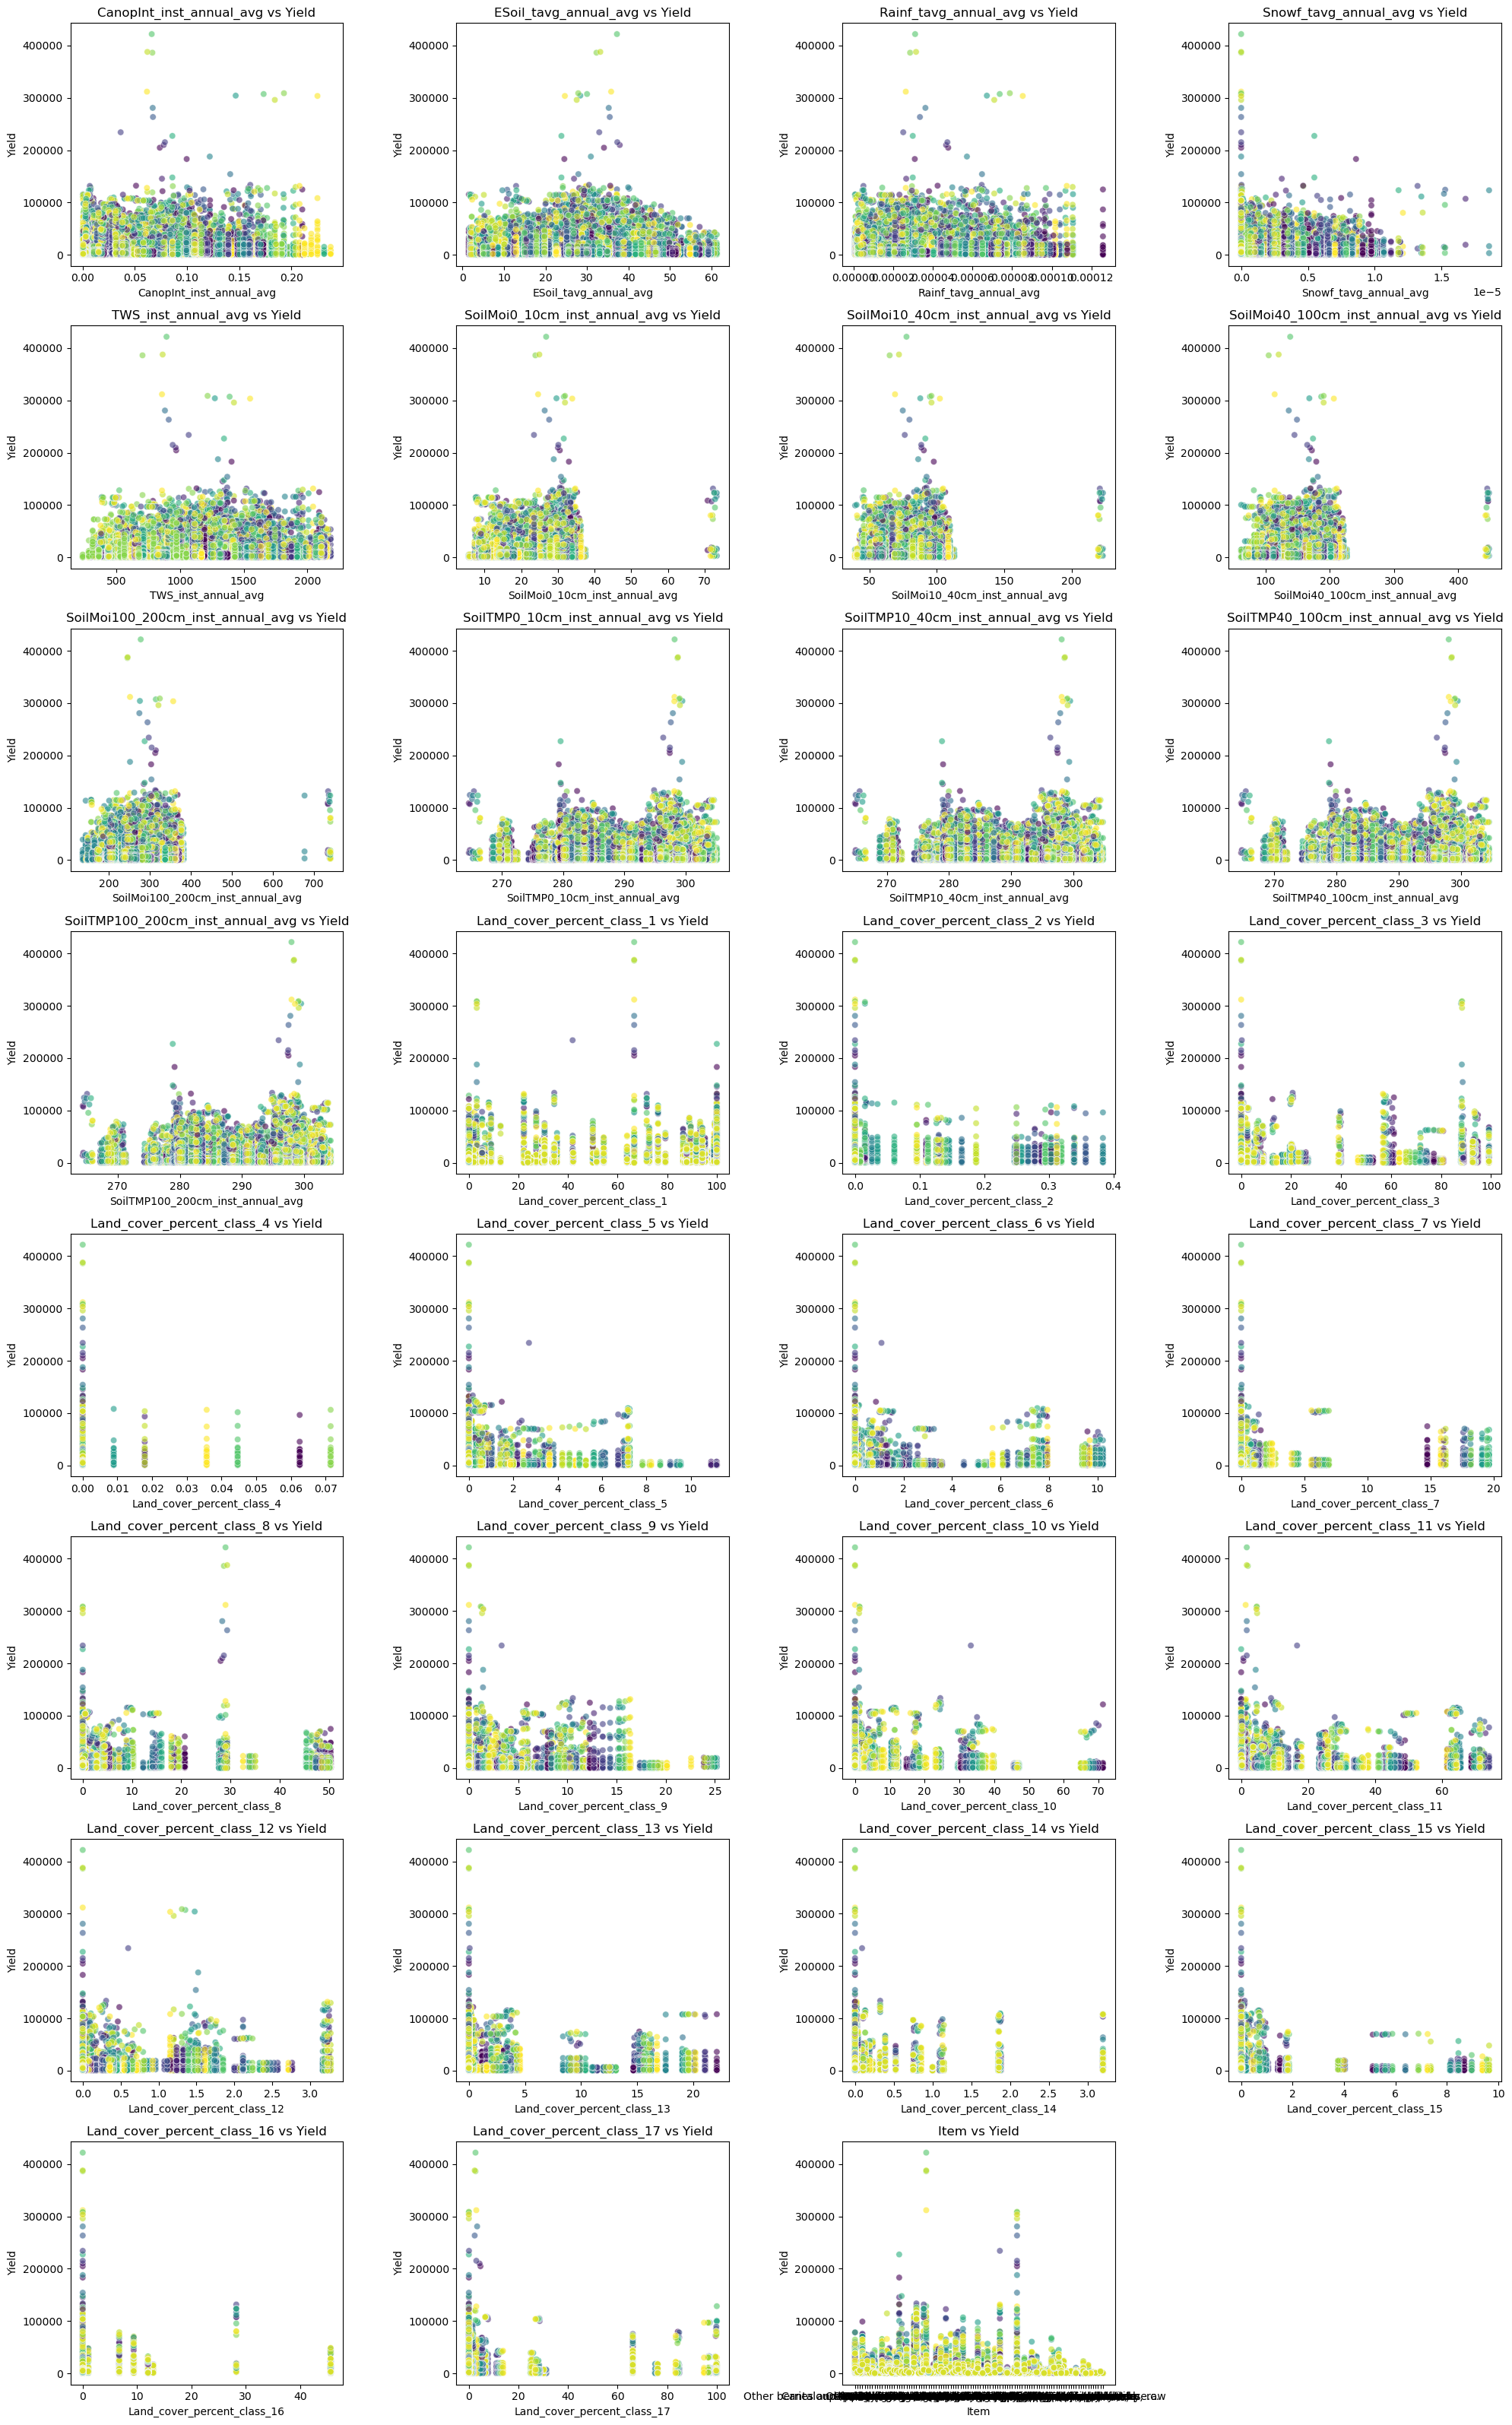

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluded columns
excluded_cols = ['latitude', 'longitude', 'year', 'country', 'target_yield']

# Select features to plot
features_to_plot = [col for col in final_df.columns if col not in excluded_cols]

# Plot setup
num_features = len(features_to_plot)
plots_per_row = 4
num_rows = -(-num_features // plots_per_row)  # Ceiling division

plt.figure(figsize=(20, num_rows * 4))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.scatterplot(data=final_df, x=feature, y='target_yield', hue='year', palette='viridis', alpha=0.6, legend=False)
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.title(f'{feature} vs Yield')

plt.tight_layout()
plt.show()

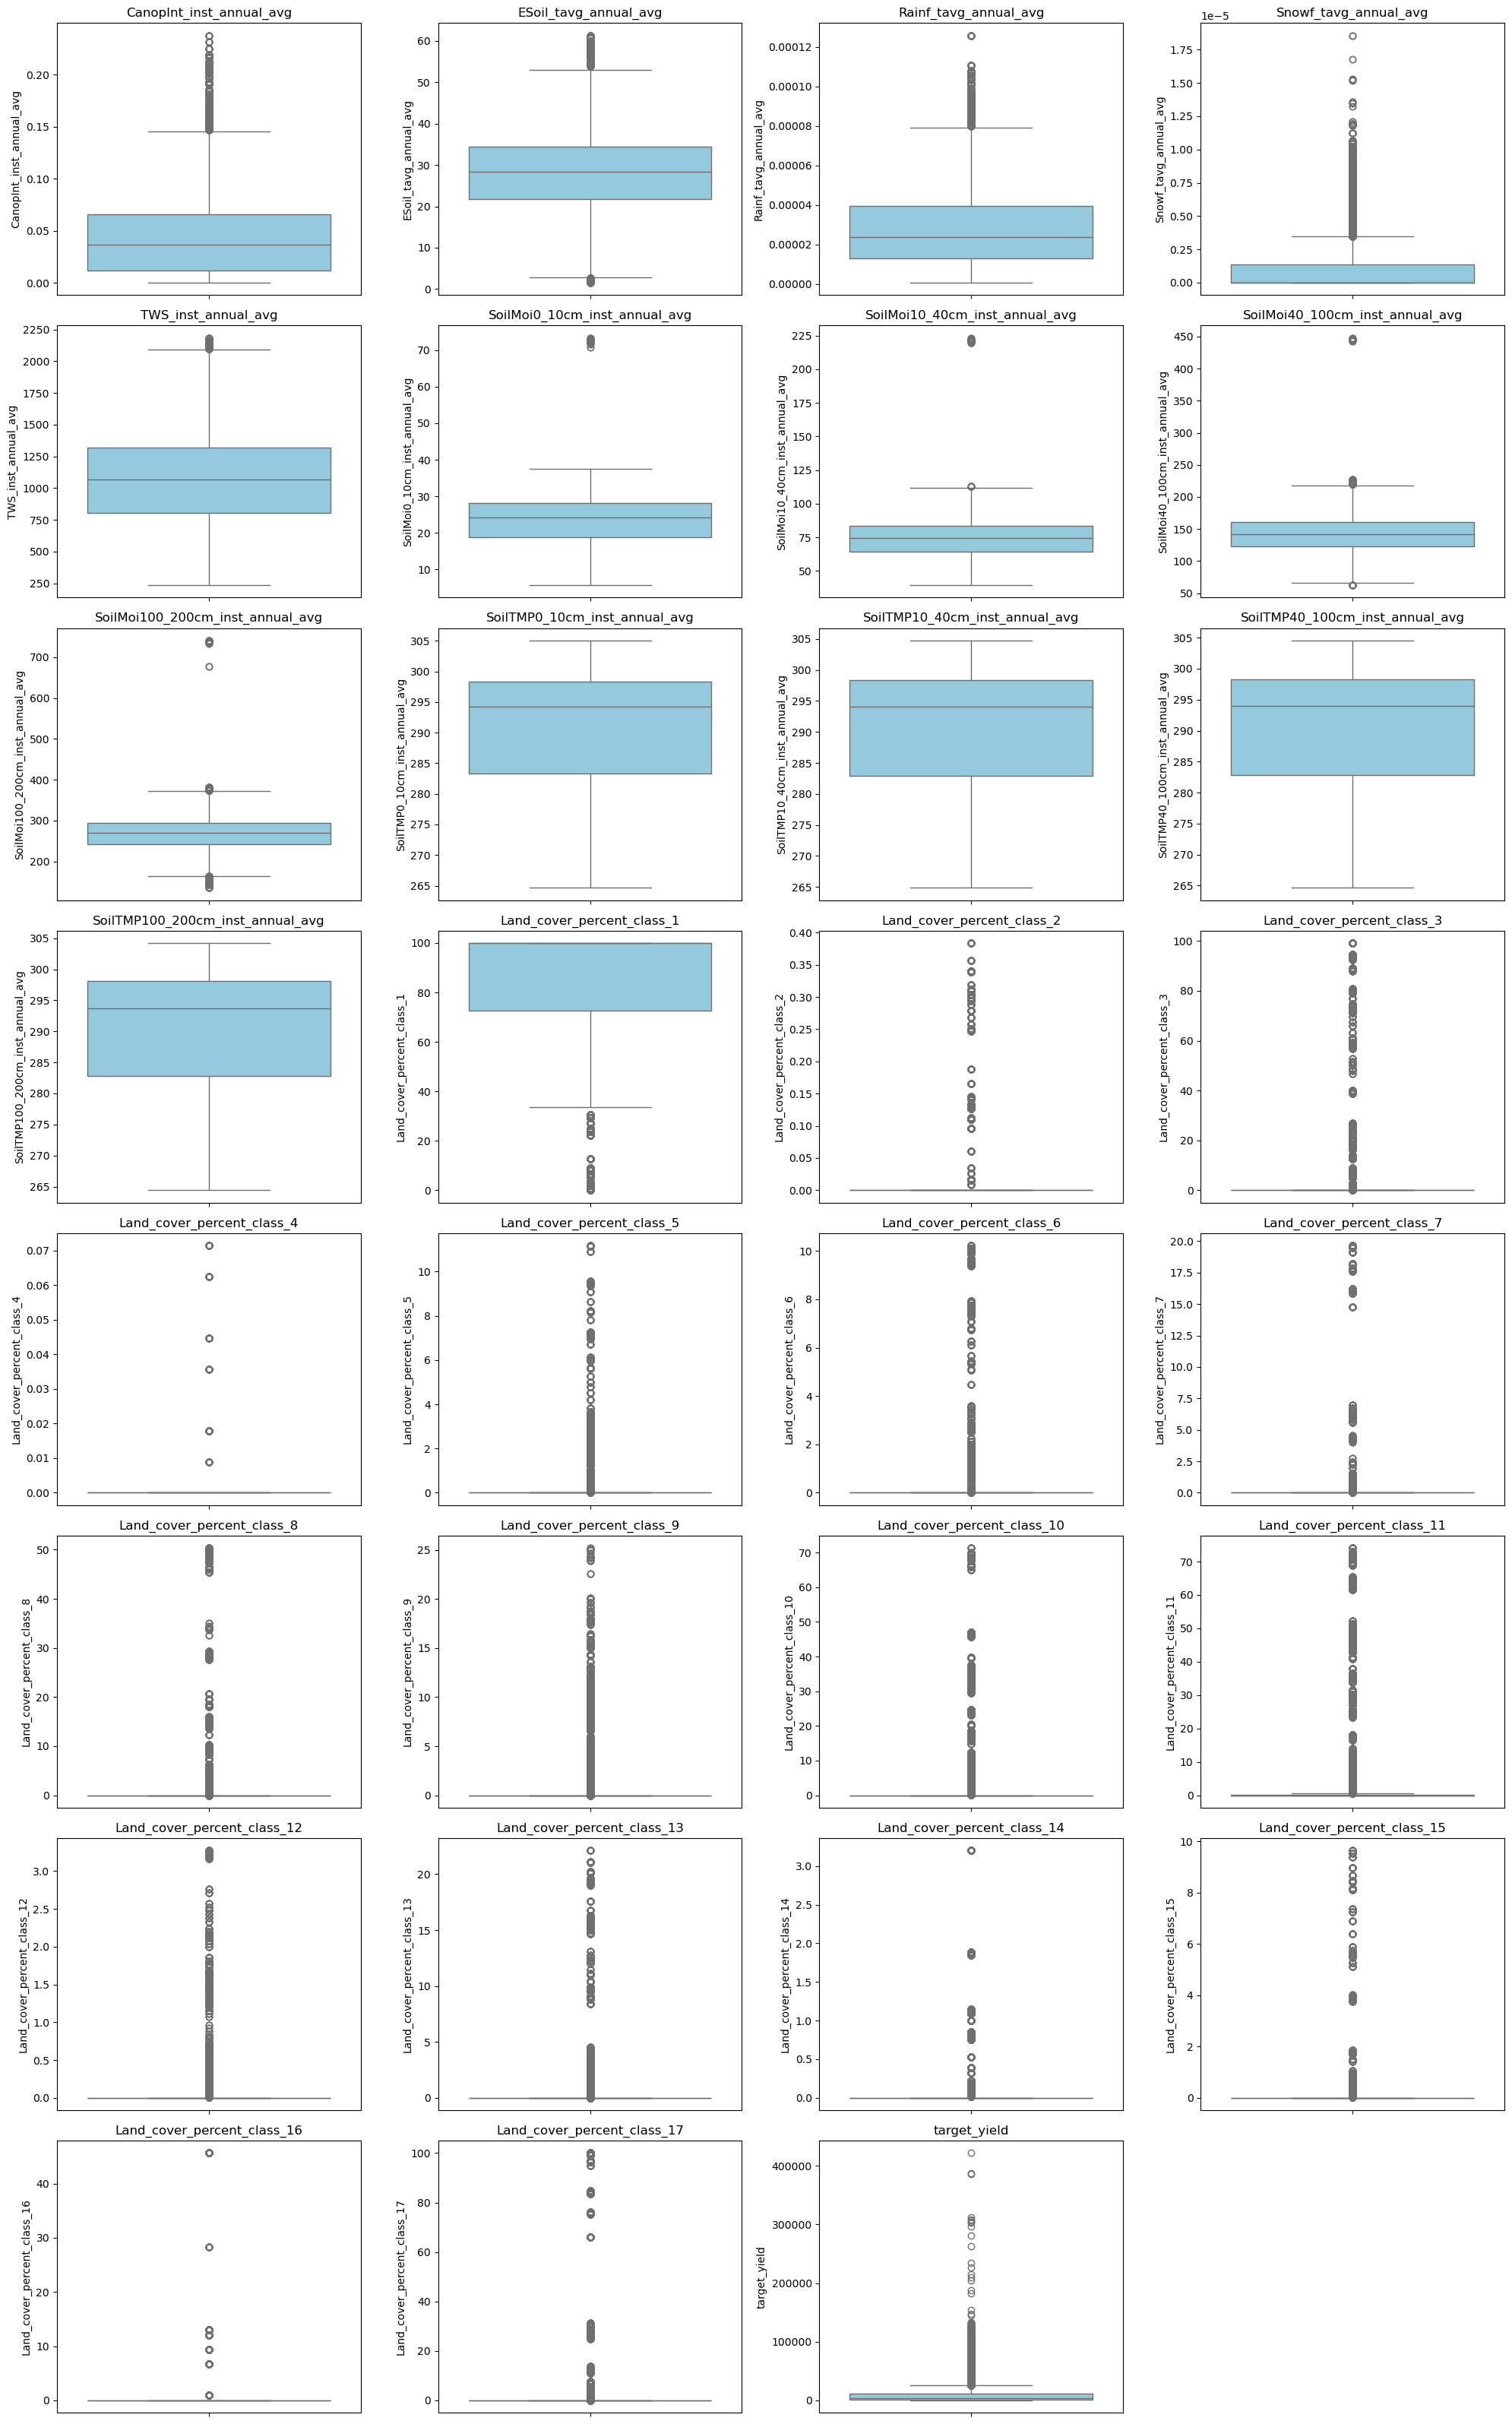

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_cols = final_df.select_dtypes(include='number').columns.tolist()
exclude_cols = ['longitude', 'latitude', 'year', 'country']  # Optional: also exclude if not relevant
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Plot boxplots for each numeric feature to spot outliers
num_features = len(numeric_cols)
plots_per_row = 4
num_rows = -(-num_features // plots_per_row)  # Ceiling division

plt.figure(figsize=(20, num_rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.boxplot(y=final_df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [77]:
# # Define the columns to apply the filter on
# columns_to_filter = [
#     'SoilMoi0_10cm_inst_annual_avg',
#     'SoilMoi10_40cm_inst_annual_avg',
#     'SoilMoi40_100cm_inst_annual_avg',
#     'SoilMoi100_200cm_inst_annual_avg',
#     'target_yield'
# ]

# # Filter out rows where any of the columns exceed their 95th percentile
# for col in columns_to_filter:
#     threshold = final_df[col].quantile(0.95)
#     final_df = final_df[final_df[col] <= threshold]


In [166]:
final_df.shape

(62498, 36)

## Modelling

In [161]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Step 1: Drop and separate columns
drop_cols = ['year',  'target_yield']

categorical_features = ['Item', 'country']

numeric_features = [col for col in final_df.columns if col not in drop_cols + categorical_features]

# Step 2: Split train/val
train_df = final_df[final_df['year'] < 2021]
val_df = final_df[final_df['year'] == 2021]


# Step 3: Targets
y_train = train_df['target_yield'].values
y_val = val_df['target_yield'].values

train_df.drop(['target_yield','year'], axis=1, inplace=True)
val_df.drop(['target_yield','year'], axis=1, inplace=True)

# Step 4: Pipeline for categorical features → OneHot → no scaler yet
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Step 5: Combine all into preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 6: Build final pipeline to include StandardScaler
full_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('scale', StandardScaler())
])

# Step 7: Fit-transform
X_train = full_pipeline.fit_transform(train_df)
X_val = full_pipeline.transform(val_df)

In [157]:
X_train[0]

array([ 0.75896625,  0.43554288, -1.02104739, -0.96489761, -1.0566738 ,
       -0.12023025, -1.01518749, -0.98994179, -0.51144664, -0.28307559,
       -0.55065132, -0.22209758, -0.20031659, -0.20227463, -0.21477974,
        0.59004985, -0.17709852, -0.26733001, -0.06100787, -0.2349114 ,
       -0.21127933, -0.11814504, -0.2125564 , -0.36436916, -0.32089924,
       -0.33397616, -0.27846382, -0.24614853, -0.23014026, -0.16683011,
       -0.15439789, -0.23792854, -0.03098865, -0.03920918,  7.53213993,
       -0.11293629, -0.10179822, -0.03619326, -0.13357842, -0.1385653 ,
       -0.14490455, -0.07191907, -0.107588  , -0.06878913, -0.04364548,
       -0.12536047, -0.02771443, -0.0752733 , -0.10524088, -0.11126111,
       -0.09769564, -0.1066718 , -0.08201018, -0.04009179, -0.0798262 ,
       -0.08508002, -0.09632156, -0.06048937, -0.04242501, -0.05290293,
       -0.13215082, -0.13934784, -0.03420615, -0.01385322, -0.0572062 ,
       -0.0195933 , -0.0366733 , -0.06510871, -0.06510871, -0.13

In [163]:
y_train

array([7000. , 7651.9, 7600.5, ..., 3914.9, 4779.6, 5075.9])

In [154]:
X_val

array([[ 0.75896625,  0.43554288, -1.0274829 , ..., -0.08559849,
        -0.06470218, -0.09313474],
       [ 0.75896625,  0.43554288, -1.0274829 , ..., -0.08559849,
        -0.06470218, -0.09313474],
       [ 0.75896625,  0.43554288, -1.0274829 , ..., -0.08559849,
        -0.06470218, -0.09313474],
       ...,
       [ 0.15257567, -1.61918567, -0.73630154, ..., -0.08559849,
        -0.06470218, 10.73713202],
       [ 0.15257567, -1.61918567, -0.73630154, ..., -0.08559849,
        -0.06470218, 10.73713202],
       [ 0.15257567, -1.61918567, -0.73630154, ..., -0.08559849,
        -0.06470218, 10.73713202]])

In [165]:
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

# 2. Initialize and fit the scaler
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_val_scaled = scaler_y.transform(y_val_reshaped)

In [167]:
y_train_scaled

array([[-0.16407563],
       [-0.11886052],
       [-0.12242557],
       ...,
       [-0.37805499],
       [-0.31808029],
       [-0.29752923]])

## Multi Layer Perceptron

In [197]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random

# Set seeds for reproducibility
# random_seed = 42
# random.seed(random_seed)
# torch.manual_seed(random_seed)
# np.random.seed(random_seed)

In [199]:
class YieldDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Regression output shape

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [201]:
class ThreeLayerMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super(ThreeLayerMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], 1),      # Output: one regression value
            nn.ReLU()  # Optional: only use if you're predicting a normalized yield (0 to 1)
        )

    def forward(self, x):
        return self.network(x)

In [203]:
batch_size = 32

train_dataset = YieldDataset(X_train, y_train_scaled)
val_dataset = YieldDataset(X_val, y_val_scaled)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

In [205]:
input_dim = X_train.shape[1]
hidden_layers = [128, 64]
learning_rate = 0.0001
num_epochs = 150

model = ThreeLayerMLP(input_size=input_dim, hidden_sizes=hidden_layers)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()

In [207]:
best_val_loss = float('inf')
losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_pred = model(X_val_batch)
            val_loss = loss_function(val_pred, y_val_batch)

    losses.append((running_loss / len(train_loader), val_loss.item()))

    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model = model.state_dict()
        best_epoch = epoch
        print(f"Epoch {epoch}: Improved val loss to {val_loss.item():.4f}")

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Train Loss: {running_loss / len(train_loader):.4f} | Val Loss: {val_loss.item():.4f}")

Epoch 0: Improved val loss to 0.4582
Epoch 0 | Train Loss: 0.6460 | Val Loss: 0.4582
Epoch 1: Improved val loss to 0.3805
Epoch 2: Improved val loss to 0.3317
Epoch 3: Improved val loss to 0.3089
Epoch 4: Improved val loss to 0.2864
Epoch 6: Improved val loss to 0.2758
Epoch 7: Improved val loss to 0.2674
Epoch 9: Improved val loss to 0.2657
Epoch 10: Improved val loss to 0.2524
Epoch 10 | Train Loss: 0.2458 | Val Loss: 0.2524
Epoch 14: Improved val loss to 0.2447
Epoch 16: Improved val loss to 0.2380
Epoch 20 | Train Loss: 0.2352 | Val Loss: 0.2475
Epoch 22: Improved val loss to 0.2374
Epoch 23: Improved val loss to 0.2372
Epoch 30 | Train Loss: 0.2308 | Val Loss: 0.2442
Epoch 40 | Train Loss: 0.2285 | Val Loss: 0.2443
Epoch 50 | Train Loss: 0.2260 | Val Loss: 0.2569
Epoch 60 | Train Loss: 0.2251 | Val Loss: 0.2407
Epoch 70 | Train Loss: 0.2232 | Val Loss: 0.2552
Epoch 75: Improved val loss to 0.2367
Epoch 80 | Train Loss: 0.2218 | Val Loss: 0.2546
Epoch 90 | Train Loss: 0.2211 | Val 

In [209]:
model.load_state_dict(best_model)  # Load best model
model.eval()

with torch.no_grad():
    final_preds = model(torch.tensor(X_val, dtype=torch.float32))
    mse = loss_function(final_preds, torch.tensor(y_val_scaled, dtype=torch.float32).view(-1, 1))
    print(f"\nFinal Validation MSE: {mse.item():.4f}")


Final Validation MSE: 0.2557


In [214]:
from sklearn.metrics import r2_score

# Make predictions on validation data
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_val, dtype=torch.float32)).numpy()
    y_true = y_val_scaled  # already numpy array

y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_true_unscaled = scaler_y.inverse_transform(y_val_scaled)

# Compute R² score
r2 = r2_score(y_true_unscaled, y_pred_unscaled)
print(f"Validation R² Score: {r2:.4f}")

rmse = np.sqrt(mean_squared_error(y_true_unscaled, y_pred_unscaled))
mae = mean_absolute_error(y_true_unscaled, y_pred_unscaled)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")

Validation R² Score: 0.7699
Validation RMSE: 7290.58
Validation MAE: 5504.21


In [222]:
import pandas as pd

# Flatten arrays to 1D if they’re in (n, 1) shape
true_vals = y_true_unscaled.flatten()
pred_vals = y_pred_unscaled.flatten()

# Create DataFrame
results_df = pd.DataFrame({
    'True_Value': true_vals,
    'Predicted_Value': pred_vals
})

# Show first few rows
print(results_df.head())

   True_Value  Predicted_Value
0     10600.0      9365.600586
1      7527.9      9365.600586
2      1375.0      9365.600586
3     10663.5      9365.600586
4      4150.5      9365.600586


In [226]:
results_df.to_csv(file_path + r'\ML_Yield_results_csv.csv',index=False)

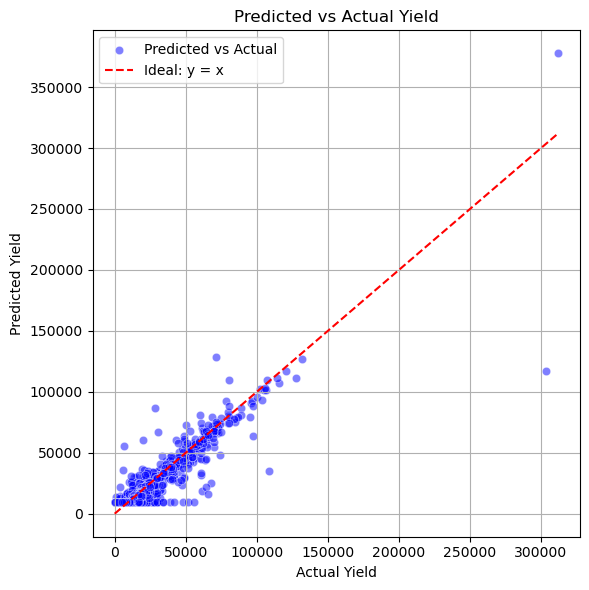

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Plot predictions
sns.scatterplot(x=true_vals, y=pred_vals, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot ideal line
plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)],
         color='red', linestyle='--', label='Ideal: y = x')

# Labels and legend
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Predicted vs Actual Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

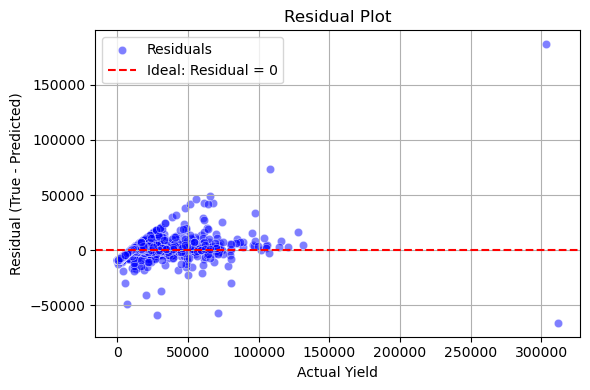

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = true_vals - pred_vals

plt.figure(figsize=(6, 4))

# Plot residuals
sns.scatterplot(x=true_vals, y=residuals, alpha=0.5, color='blue', label='Residuals')

# Plot horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', label='Ideal: Residual = 0')

# Labels and legend
plt.xlabel("Actual Yield")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()